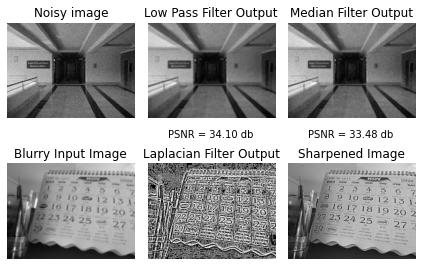

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 16 14:04:39 2020

"""

import matplotlib.pyplot as plt
import matplotlib.image as mpltimg
import numpy as np
import math


# _______ 3 user defined functions which you have to code their functionality_________

# Function for making Duplicate Padding
def duplicate_padding(arr, size):

    list1 = []  # Initialise a list to take the upper border pixels of real image
    list2 = []  # Initialise a list to take the left border pixels of real image
    list3 = []  # Initialise a list to take the lower border pixels of real image
    list4 = []  # Initialise a list to take the right border pixels of real image

    # Fill list1 by upper border pixels of real image
    for i in range(size, arr.shape[1]-size):
        list1.append(arr[size][i])

    # Copy list1 in upper padded zero pixels
    for i in range(size-1, -1, -1):
        list1.insert(0, list1[0])
        list1.append(list1[len(list1)-1])
        arr[i][i:i+len(list1)] = list1

    # Fill list2 by left border pixels of real image
    for i in range(size, arr.shape[0]-size):
        list2.append(arr[i][size])

    # Copy list2 in left padded zero pixels
    for i in range(size-1, -1, -1):
        list2.insert(0, list2[0])
        list2.append(list2[len(list2)-1])
        index = 0
        for j in range(i, i+len(list2)):
            arr[j][i] = list2[index]
            index += 1

    # Fill list3 by lower border pixels of real image
    for i in range(size, arr.shape[1]-size):
        list3.append(arr[arr.shape[0]-size-1][i])

    # Copy list3 in lower padded zero pixels
    t = size-1
    for i in range(arr.shape[0]-size, arr.shape[0]):
        list3.insert(0, list3[0])
        list3.append(list3[len(list3)-1])
        arr[i][t:t+len(list3)] = list3
        t -= 1

    # Fill list4 by right border pixels of real image
    for i in range(size, arr.shape[0]-size):
        list4.append(arr[i][arr.shape[1]-size-1])

    # Copy list4 in right padded zero pixels
    t = size-1
    for i in range(arr.shape[1]-size, arr.shape[1]):
        list4.insert(0, list4[0])
        list4.append(list4[len(list4)-1])
        index = 0
        for j in range(t, t+len(list4)):
            arr[j][i] = list4[index]
            index += 1
        t -= 1

    return arr  # Return the padded array of duplicate boundary pixel

# Function for making Mirror Padding
def mirror_padding(arr, img, size):
    
    # Fill the upper
    row=1
    for i in range(size-1,-1,-1):
        arr[i][size:size+img.shape[1]]=img[row][0:img.shape[1]]
        row+=1

    row=img.shape[0]-2
    for i in range(size+img.shape[0],size+img.shape[0]+size):
        arr[i][size:size+img.shape[1]]=img[row][0:img.shape[1]]
        row-=1

    col=1
    for i in range(size-1,-1,-1):
        row=0
        for j in range(size,size+img.shape[0]):
            arr[j][i]=img[row][col]
            row+=1
        col+=1

    col=img.shape[1]-2
    for i in range(size+img.shape[1],size+img.shape[1]+size):
        row=0
        for j in range(size,size+img.shape[0]):
            arr[j][i]=img[row][col]
            row+=1
        col-=1

    for i in range(size):
        for j in range(size):
            arr[i][j] = arr[i][size*2 - j]

    for i in range(size):
        for j in range(size):
            arr[i+size+img.shape[0]][j] = arr[i+size+img.shape[0]][size*2 - j]

    for i in range(size):
        for j in range(size):
            arr[i][size*2 +img.shape[1]-1-j] = arr[i][img.shape[0]-1+j]

    for i in range(size):
        for j in range(size):
            arr[i+size+img.shape[0]][size*2 +img.shape[1]-1-j] = arr[i+size+img.shape[0]][img.shape[0]-1+j]

    return arr

def padding(img, size, type):

    # Initialise the Padded Matrix
    padded_arr = np.zeros((img.shape[0]+(size*2), img.shape[1]+(size*2)))

    # Fill the padded matrix by original image
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            padded_arr[i+size][j+size] = img[i][j]

    if(type == 1):
        padded_arr = duplicate_padding(padded_arr, size)
    if(type == 2):
        padded_arr = mirror_padding(padded_arr, img, size)

    return padded_arr # Return padded array


def convolution2D(img, kernel, padding_type):

    # write your code here
    # padding_type can take values 0, 1 or 2
    # 0 - zero padding
    # 1 - duplicate boundary pixels for padding
    # 2 - padding is done by mirroring the pixels

    kernel_size = kernel.shape[0]  # Get the size of Kernel

    # Get the no. of Padding with real image matrix
    padding_size = int(kernel.shape[0]/2)

    # Initialise the matrix to store the resultant image
    new_img = np.zeros(img.shape, 'uint8')

    # Padding with real image matrix and get a new padded matrix
    padded_arr = padding(img, padding_size, padding_type)

    # Compute the reusltant matrix by convolution
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            new_img[i][j] = np.sum(padded_arr[i:i+kernel_size, j:j+kernel_size]*kernel)

    # should handle kernel of any size but odd values only eg. 5x5, 7x7
    # image is a grayscale image

    filt_image = new_img  # dummy assignment (to be removed)
    return filt_image  # return the resultant matrix


def medianFiltering(img, kernel_size, padding_type):
    # write your code here
    # padding_type can take values 0, 1 or 2
    # 0 - zero padding
    # 1 - duplicate boundary pixels for padding
    # 2 - padding is done by mirroring the pixels

    # Get the no. of Padding with real image matrix
    padding_size = int(kernel_size/2)

    # Initialise the matrix to store the resultant image
    new_img = np.zeros(img.shape, 'uint8')

    # Padding with real image matrix and get a new padded matrix
    padded_arr = padding(img, padding_size, padding_type)

    # Compute the resultang image
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            median = np.zeros((kernel_size, kernel_size))
            median = padded_arr[i:i+kernel_size, j:j+kernel_size]
            np.reshape(median, (kernel_size*kernel_size), order='F')
            np.sort(median)
            new_img[i][j] = np.median(median)

    # should handle kernel of any size but odd values only eg. 5x5, 7x7
    # image is a grayscale image

    med_image = new_img  # dummy assignment (to be removed)
    return med_image


# You can club the above two functions/write any other functions additionally if you wish

def computePSNR(image1, image2):
    psnr = 0
    MSE = 0

    # Compute MSE
    for i in range(image1.shape[0]):
        for j in range(image1.shape[1]):
            MSE = MSE+(image1[i][j]-image2[i][j])*(image1[i][j]-image2[i][j])
    MSE = MSE/(image1.shape[0]*image1.shape[1])

    # Compute PSNR
    psnr = 20 * math.log10(255/math.sqrt(MSE))
    return psnr


# _____________________main program begins here___________________

def main():
    # reading a noisy image
    noisy_image = mpltimg.imread('images/noisy_image.jpg')

    original_image = mpltimg.imread('images/original.jpg')


# _____________________________________________________________________
# Average filter kernel
    kernel = 1/9 * np.array([[1, 1, 1],
                             [1, 1, 1],
                             [1, 1, 1]])

    low_pass_filtered_image = convolution2D(noisy_image, kernel, 2)

    avg_psnr = computePSNR(original_image, low_pass_filtered_image)

    med_filtered_image = medianFiltering(noisy_image, 3, 2)

    med_psnr = computePSNR(original_image, med_filtered_image)


# _____________________________________________________________________
# reading a blurry image
    blurry_image = mpltimg.imread('blurry_image.jpg')

    # Laplacian filter kernel
    kernel = np.array([[1, 1, 1],
                       [1, -8, 1],
                       [1, 1, 1]])

    laplacian_filtered_image = convolution2D(blurry_image, kernel, 1)

# perform the addition as in Eqn. 3.6.7 to obtain the sharpened image

    if kernel[int(kernel.shape[0]/2)][int(kernel.shape[0]/2)] > 0:
        c = 1
    else:
        c = -1

    sharpened_image = np.zeros(blurry_image.shape, 'uint8')

    for i in range(blurry_image.shape[0]):
        for j in range(blurry_image.shape[1]):
            sharpened_image[i][j] = blurry_image[i][j] + c * laplacian_filtered_image[i][j]

    # sharpened_image = blurry_image # dummy assignment (to be removed)


# _____________________________________________________________________
# Code to display the images

    fig, axes = plt.subplots(nrows=2, ncols=3)

    ax = axes.ravel()

    ax[0].imshow(noisy_image, cmap='gray')
    ax[0].set_title("Noisy image")
    ax[0].set_axis_off()

    ax[1].imshow(low_pass_filtered_image, cmap='gray')
    ax[1].set_title("Low Pass Filter Output")
    ax[1].set_axis_off()
    ax[1].text(x=40, y=230, s="PSNR = %1.2f db" % avg_psnr)

    ax[2].imshow(med_filtered_image, cmap='gray')
    ax[2].set_title("Median Filter Output")
    ax[2].set_axis_off()
    ax[2].text(x=40, y=230, s="PSNR = %1.2f db" % med_psnr)

    ax[3].imshow(blurry_image, cmap='gray')
    ax[3].set_title("Blurry Input Image")
    ax[3].set_axis_off()

    ax[4].imshow(laplacian_filtered_image, cmap='gray')
    ax[4].set_title("Laplacian Filter Output")
    ax[4].set_axis_off()

    ax[5].imshow(sharpened_image, cmap='gray')
    ax[5].set_title("Sharpened Image")
    ax[5].set_axis_off()

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()
